In [5]:
# Data Handling 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Text Preprocessing
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot Setting
sns.set_theme(style = 'darkgrid')

Load dataset

In [8]:
data = pd.read_csv("sentimentdataset.csv")
display(data.head())
print(f"\nNumber of rows and columns: {data.shape}")
print(f"Number of columns: {data.shape[1]}")

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



Number of rows and columns: (732, 15)
Number of columns: 15


In [14]:
data.columns = data.columns.astype(str).str.lower().str.strip()
print(f"Number of duplicated values in data : {data.duplicated().sum()}")
print(f"Number of missing values in data: {data.isnull().sum()}")
print("Numerical summary of data : \n")
display(data.describe())
print("\nSentiment Classes ")
display(data['sentiment'].value_counts())

Number of duplicated values in data : 0
Number of missing values in data: unnamed: 0.1    0
unnamed: 0      0
text            0
sentiment       0
timestamp       0
user            0
platform        0
hashtags        0
retweets        0
likes           0
country         0
year            0
month           0
day             0
hour            0
dtype: int64
Numerical summary of data : 



,unnamed: 0.1,unnamed: 0,retweets,likes,year,month,day,hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000



Sentiment Classes 


sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

Data Analysis

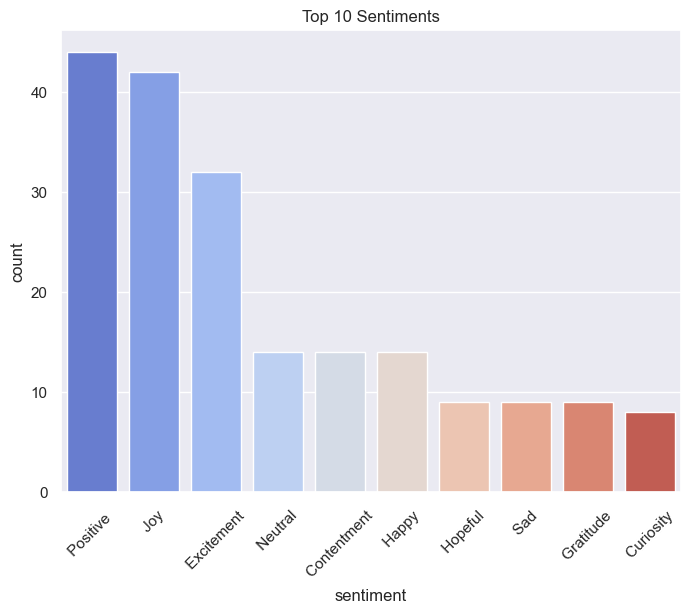

In [28]:
# Get Top 10 Sentiments by count
top_sentiments = data['sentiment'].value_counts().nlargest(10).index
df_top = data[data['sentiment'].isin(top_sentiments)]


# Sentiment Distribution
plt.figure(figsize = (8, 6))
sns.countplot(data = df_top, x = 'sentiment', palette = 'coolwarm', order = top_sentiments)
plt.title("Top 10 Sentiments")
plt.xticks(rotation = 45)
plt.show()

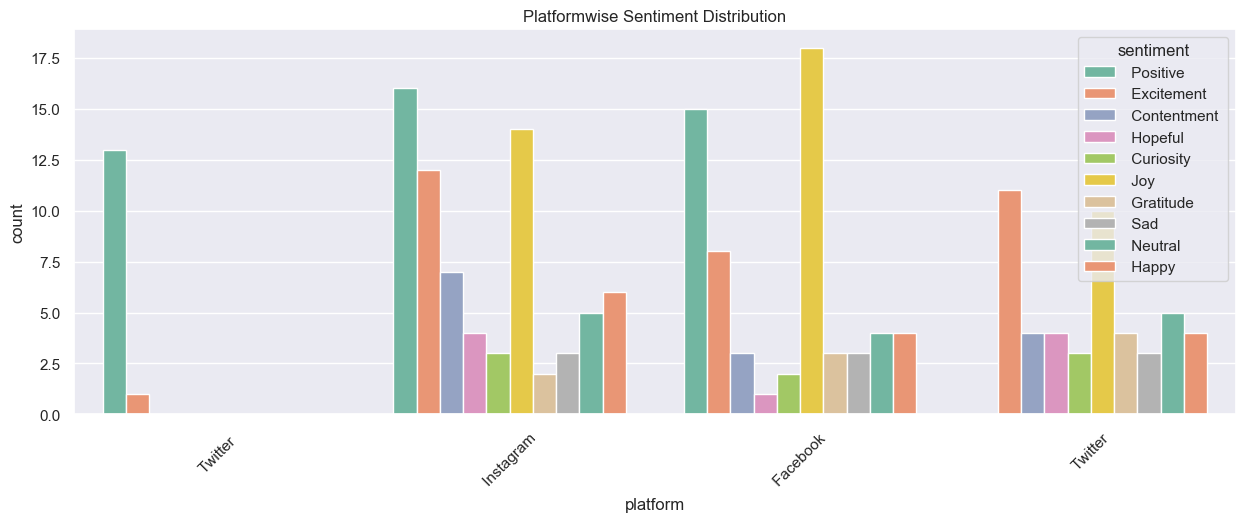

In [27]:
# Platform wise sentiment distribution
plt.figure(figsize=(15,5))
sns.countplot(data=df_top, x='platform', hue='sentiment', palette='Set2')
plt.title('Platformwise Sentiment Distribution')
plt.xticks(rotation = 45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Brazil')])

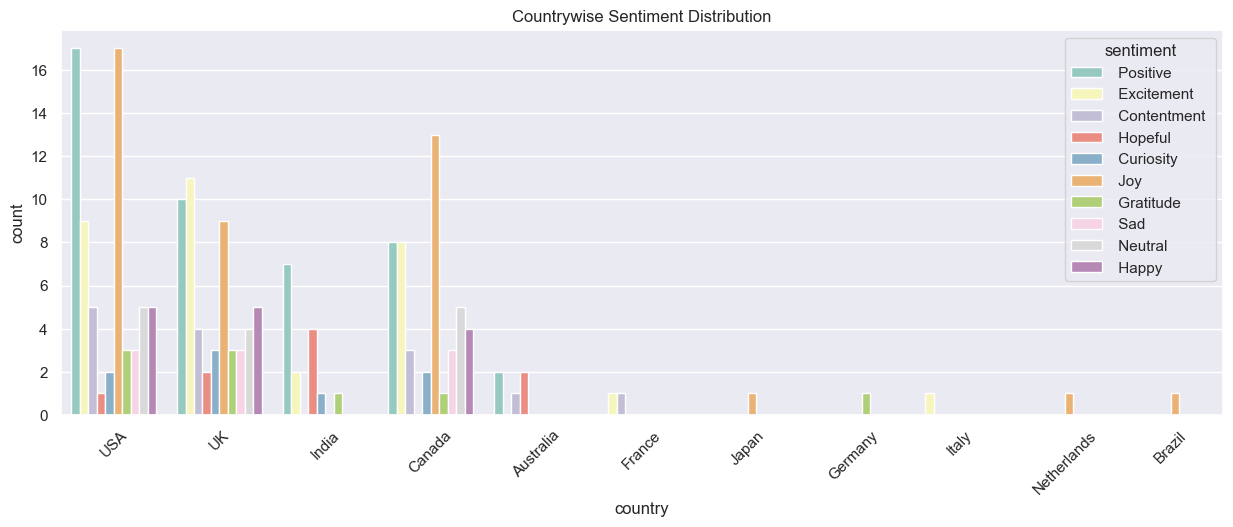

In [26]:
df_top['country'] = df_top['country'].str.strip()
# Country wise sentiment distribution
plt.figure(figsize=(15,5))
sns.countplot(data=df_top, x='country', hue='sentiment', palette='Set3')
plt.title('Countrywise Sentiment Distribution')
plt.xticks(rotation=45)

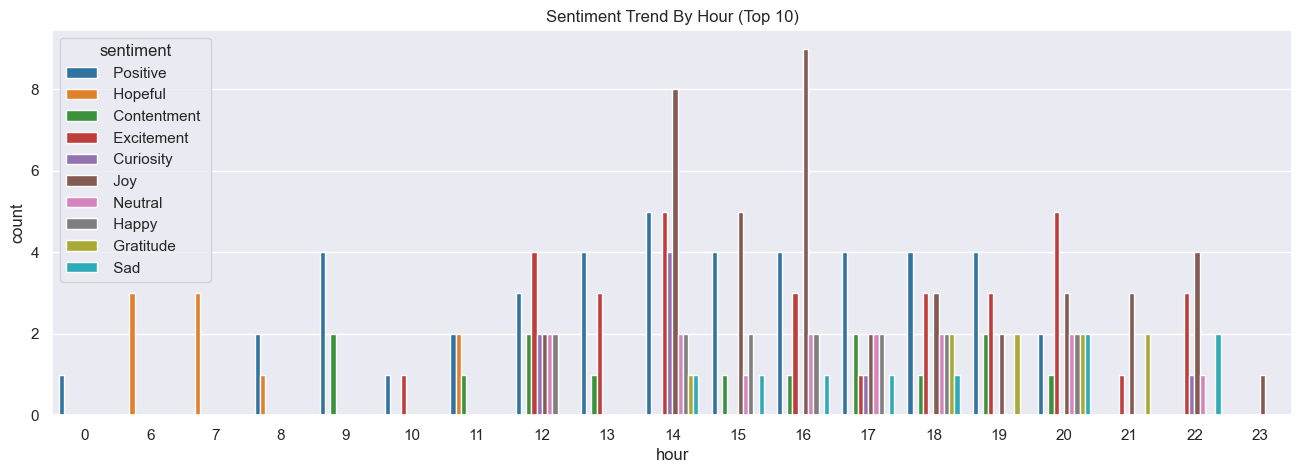

In [29]:
# Sentiment trend by Hour

plt.figure(figsize = (16, 5))
sns.countplot(data = df_top, x = 'hour', hue = 'sentiment', palette = 'tab10')
plt.title('Sentiment Trend By Hour (Top 10)')
plt.show()

Text Cleaning and Preprocessing¶


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(clean_text)
data[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


Text Analysis


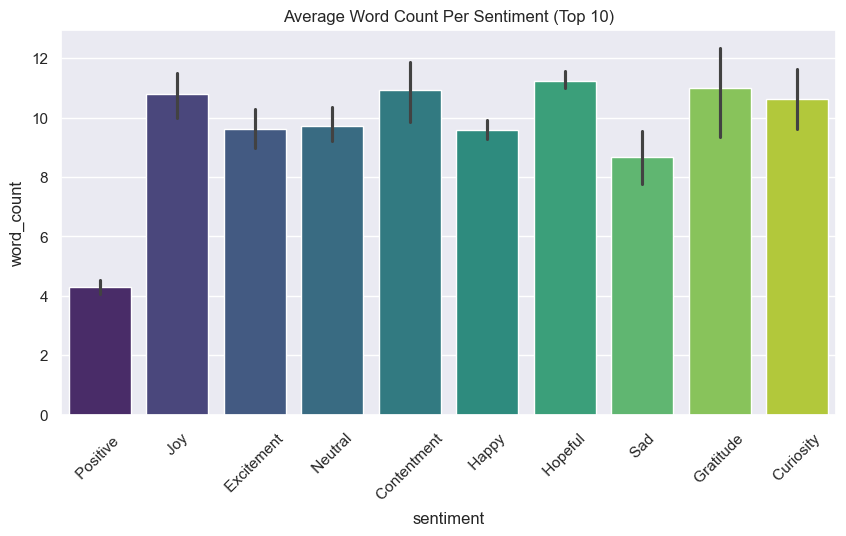


Top Words for  Positive   :


,word,frequency
0,new,10
1,day,4
2,weekend,4
3,feeling,4
4,enjoying,3



Top Words for  Joy  :


,word,frequency
0,music,7
1,art,7
2,joy,6
3,every,6
4,attended,6



Top Words for  Excitement  :


,word,frequency
0,new,8
1,adventure,5
2,excitement,4
3,weekend,4
4,attempting,4



Top Words for  Neutral  :


,word,frequency
0,new,5
1,school,5
2,exploring,3
3,club,3
4,attending,3



Top Words for  Contentment  :


,word,frequency
0,contentment,5
1,serene,3
2,river,3
3,heart,3
4,inner,3



Top Words for  Happy  :


,word,frequency
0,friends,3
1,laughter,3
2,celebrating,2
3,birthday,2
4,surprise,2



Top Words for  Hopeful  :


,word,frequency
0,hopeful,8
1,optimism,6
2,brighter,5
3,tomorrow,5
4,towards,4



Top Words for  Sad  :


,word,frequency
0,feeling,5
1,challenges,2
2,sometimes,2
3,unexpected,2
4,missing,2



Top Words for  Gratitude  :


,word,frequency
0,gratitude,3
1,story,3
2,writing,3
3,every,3
4,thankfulness,2



Top Words for  Curiosity  :


,word,frequency
0,new,4
1,curiosity,2
2,art,2
3,learning,2
4,unveiling,1


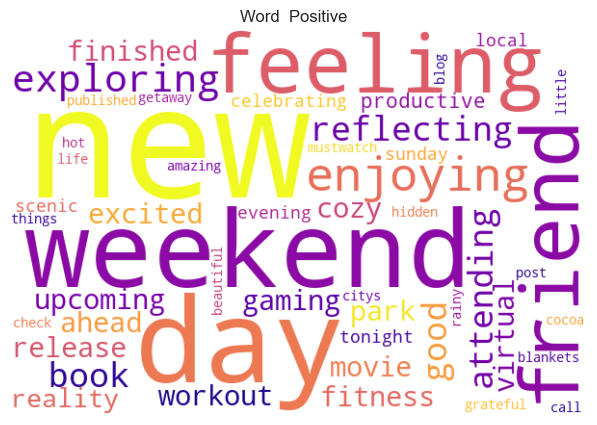

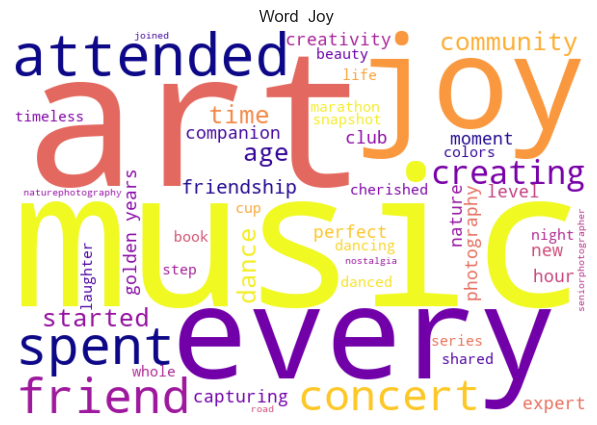

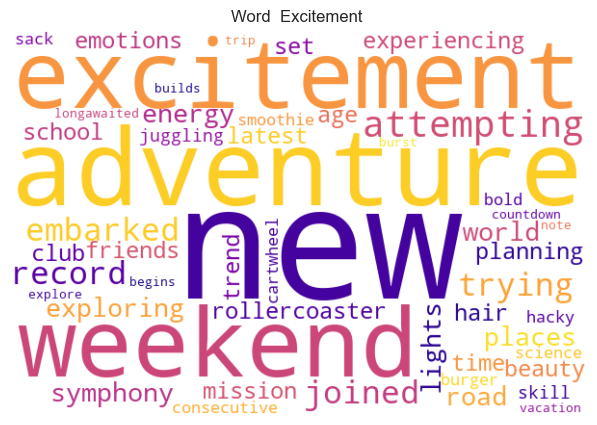

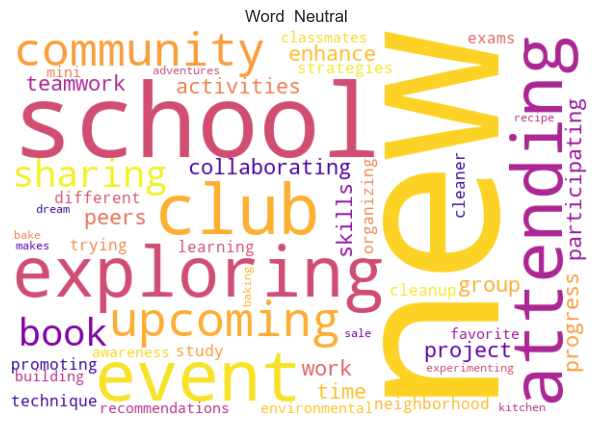

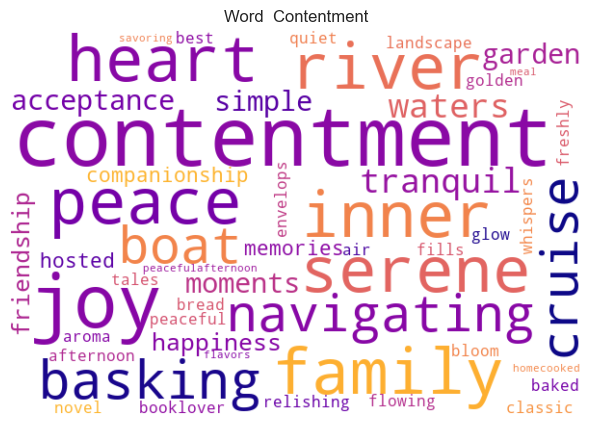

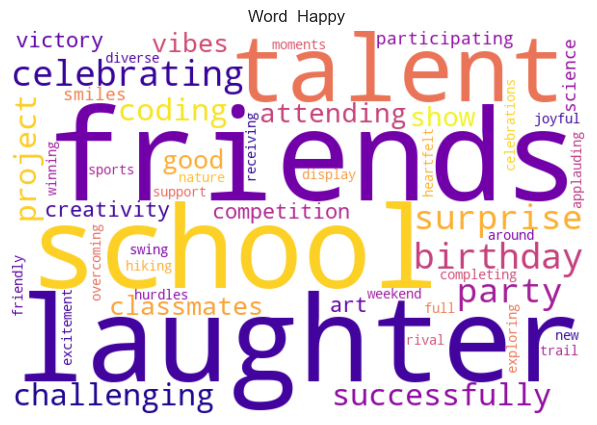

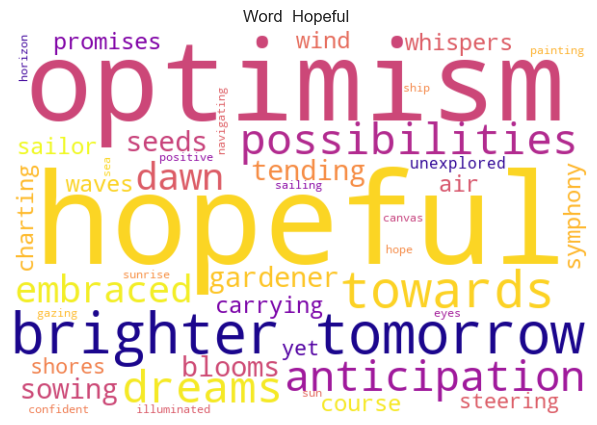

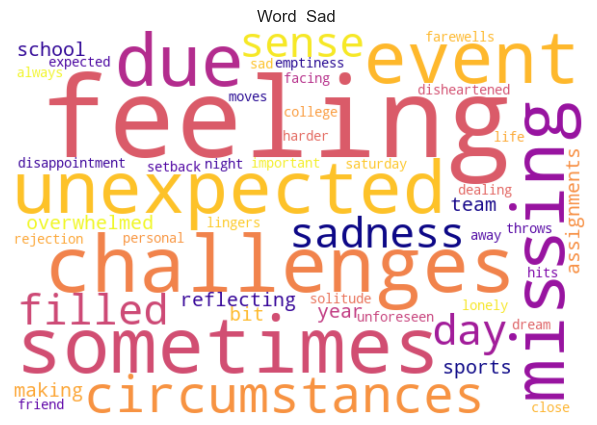

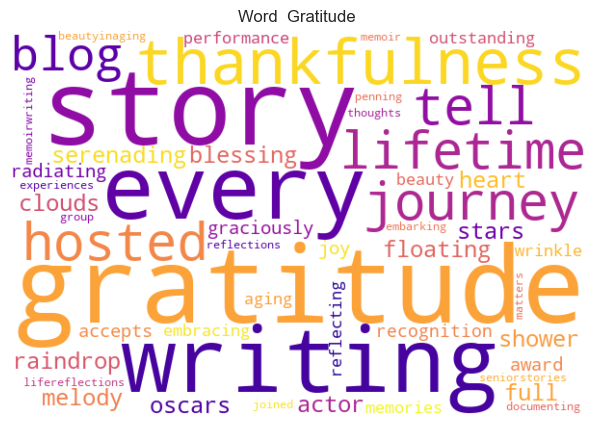

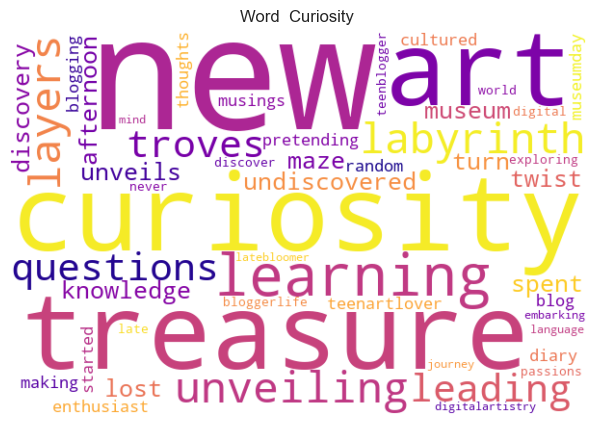

In [32]:
# Selecting top 10 most frequent sentiments

top_sentiments = data['sentiment'].value_counts().nlargest(10).index
df_top = data[data['sentiment'].isin(top_sentiments)]

# Average Word count per sentiment (Top 10)

df_top['word_count'] = df_top['clean_text'].apply(lambda x : len(x.split()))

plt.figure(figsize = (10, 5))
sns.barplot(data = df_top, x = 'sentiment', y = 'word_count', palette = 'viridis', order = top_sentiments)
plt.title('Average Word Count Per Sentiment (Top 10)')
plt.xticks(rotation = 45)
plt.show()


# Most Common Words per Sentiment (Top 10 Sentiments, Top 5 Words each)

def most_common_word(sentiment, n = 5):
    words = " ".join(df_top[df_top['sentiment'] == sentiment]['clean_text']).split()
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns = ['word', 'frequency'])

for s in top_sentiments:
    print(f'\nTop Words for {s} :')
    display(most_common_word(s, n = 5))


# WordClouds For Top 10 Sentments
for sen in top_sentiments:
    text = " ".join(df_top[df_top['sentiment'] == sen]['clean_text'])
    wc = WordCloud(width = 600, height = 400, background_color = 'white', colormap = 'plasma', max_words = 50).generate(text)
    plt.figure(figsize = (10, 5))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Word {sen}')
    plt.show()

Feature Extraction

In [36]:
counts = data['sentiment'].value_counts()
rare_counts = counts[counts < 2].index
data['sentiment'] = data['sentiment'].replace(rare_counts, 'other')
tfidf = TfidfVectorizer(max_features = 15000, 
                        ngram_range = (1, 3),
                       min_df = 2,
                       max_df = 0.95)
X = tfidf.fit_transform(data['clean_text'])
y = data['sentiment']
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size= 0.2, random_state = 42,stratify = y)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (585, 1763), Testing set size: (147, 1763)


Model Training and Comparision

In [37]:
models = {
    'Logistic regression' : LogisticRegression(max_iter = 200),
    'Linear SVM' : LinearSVC(),
    'Random Forest' : RandomForestClassifier(n_estimators = 200, random_state = 42),
    'Naive Bayes' : MultinomialNB()
}

results = {}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy {accuracy:.4f}')

Logistic regression Accuracy 0.2177
Linear SVM Accuracy 0.4626
Random Forest Accuracy 0.4218
Naive Bayes Accuracy 0.1973


Visual Representation Of Models Accuracies

<Figure size 1000x900 with 0 Axes>

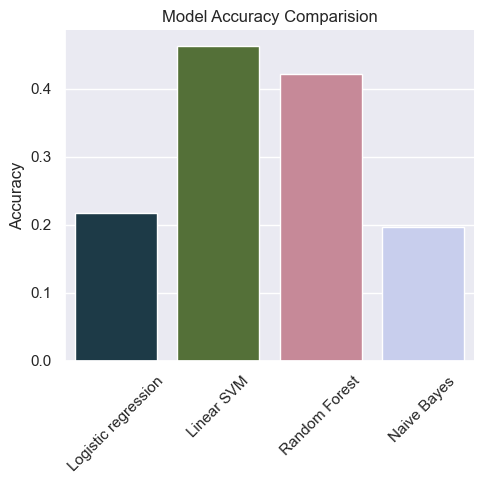


Best Perfoeming model is Linear SVM (46.26%, accuracy)


In [38]:
plt.figure(figsize = (10, 9))
sns.catplot(x = list(results.keys()), y = list(results.values()), palette = 'cubehelix', kind = 'bar', errorbar = None)
plt.title('Model Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

best_model_nme = max(results, key = results.get)
print(f'\nBest Perfoeming model is {best_model_nme} ({results[best_model_nme]:.2%}, accuracy)')

In Detail Evaluation Of Best Model

In [39]:
best_model = models[best_model_nme]
y_pred_best = best_model.predict(X_test)


print('\nClassification Report : ')
print(classification_report(y_test, y_pred_best))



Classification Report : 
                   precision    recall  f1-score   support

    Acceptance          0.00      0.00      0.00         1
 Acceptance             0.50      1.00      0.67         1
  Accomplishment        0.00      0.00      0.00         1
    Adoration           1.00      1.00      1.00         1
       Adventure        0.00      0.00      0.00         1
 Ambivalence            1.00      1.00      1.00         1
    Anticipation        0.00      0.00      0.00         0
   Arousal              1.00      1.00      1.00         1
             Awe        0.00      0.00      0.00         1
             Bad        1.00      1.00      1.00         1
        Betrayal        0.50      1.00      0.67         1
    Bitter              0.50      1.00      0.67         1
      Bitterness        1.00      1.00      1.00         1
 Boredom                1.00      1.00      1.00         1
    Calmness            0.00      0.00      0.00         1
     Captivation        0.00 

Predict Sentiment On New Data

In [40]:
def predict_sentiment(text):
    clean = clean_text(text)
    vector = tfidf.transform([clean])
    prediction = best_model.predict(vector)
    return prediction


In [41]:
# Prediction Example

samples = [
    'This movie was fantastic',
    'Just had the best experience',
    'Does anyone know if the new model is available in stores',
    'This is unacceptable'
]
for s in samples:
    print(f'Text : {s}\n Sentiment : {predict_sentiment(s)}')


Text : This movie was fantastic
 Sentiment : [' Fear         ']
Text : Just had the best experience
 Sentiment : [' Bitter       ']
Text : Does anyone know if the new model is available in stores
 Sentiment : [' Positive  ']
Text : This is unacceptable
 Sentiment : ['other']
